# Hierarchical Clustering

### Problem Statement:- 

    - Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.


### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Rename the first column
crime = crime.rename(columns={"Unnamed: 0":"State"})

In [5]:
#Checking missing values.
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State       50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime_num = crime.drop(["State"], axis = 1)
crime_num.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
crime_num.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Visualization

<Figure size 1440x1440 with 0 Axes>

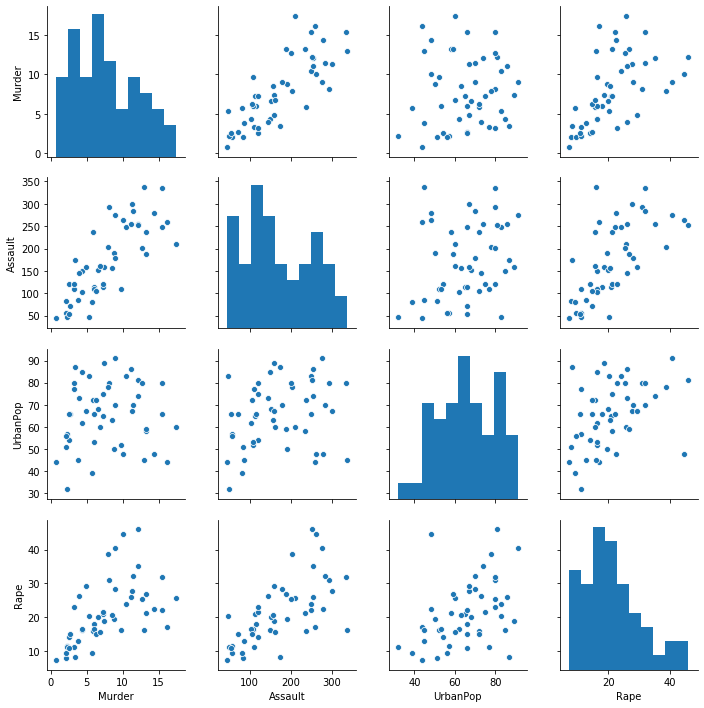

In [8]:
plt.figure(figsize=(20,20))
sns.pairplot(crime_num)
plt.show()

### Normalizing

Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

In [9]:
from sklearn.preprocessing import normalize
crime_scaled = normalize(crime_num)

In [10]:
crime_scaled = pd.DataFrame(data=crime_scaled, columns=crime_num.columns)
crime_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [11]:
crime_scaled.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


### Building the Model

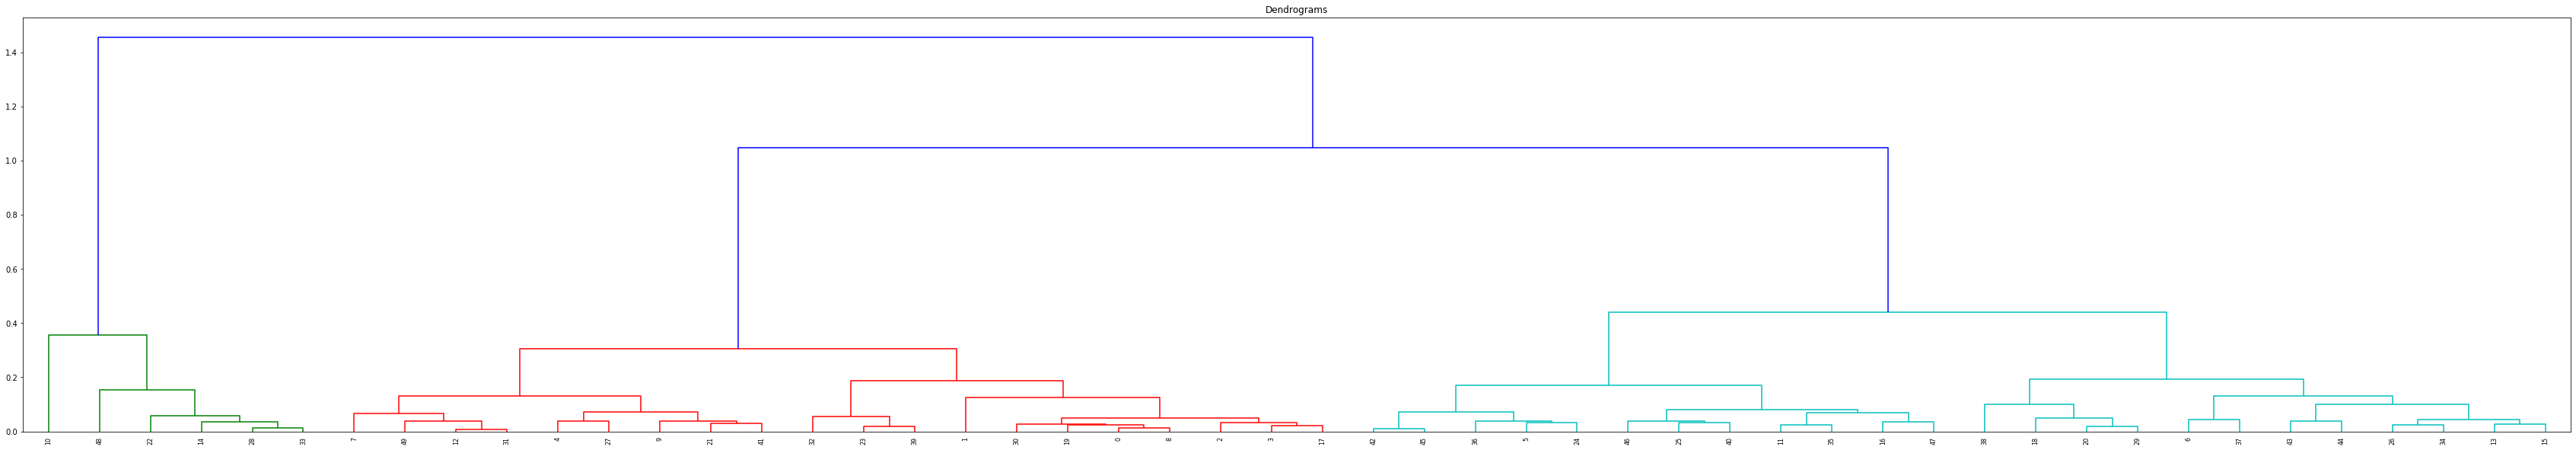

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(60, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(crime_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 0.6 and cut the dendrogram:

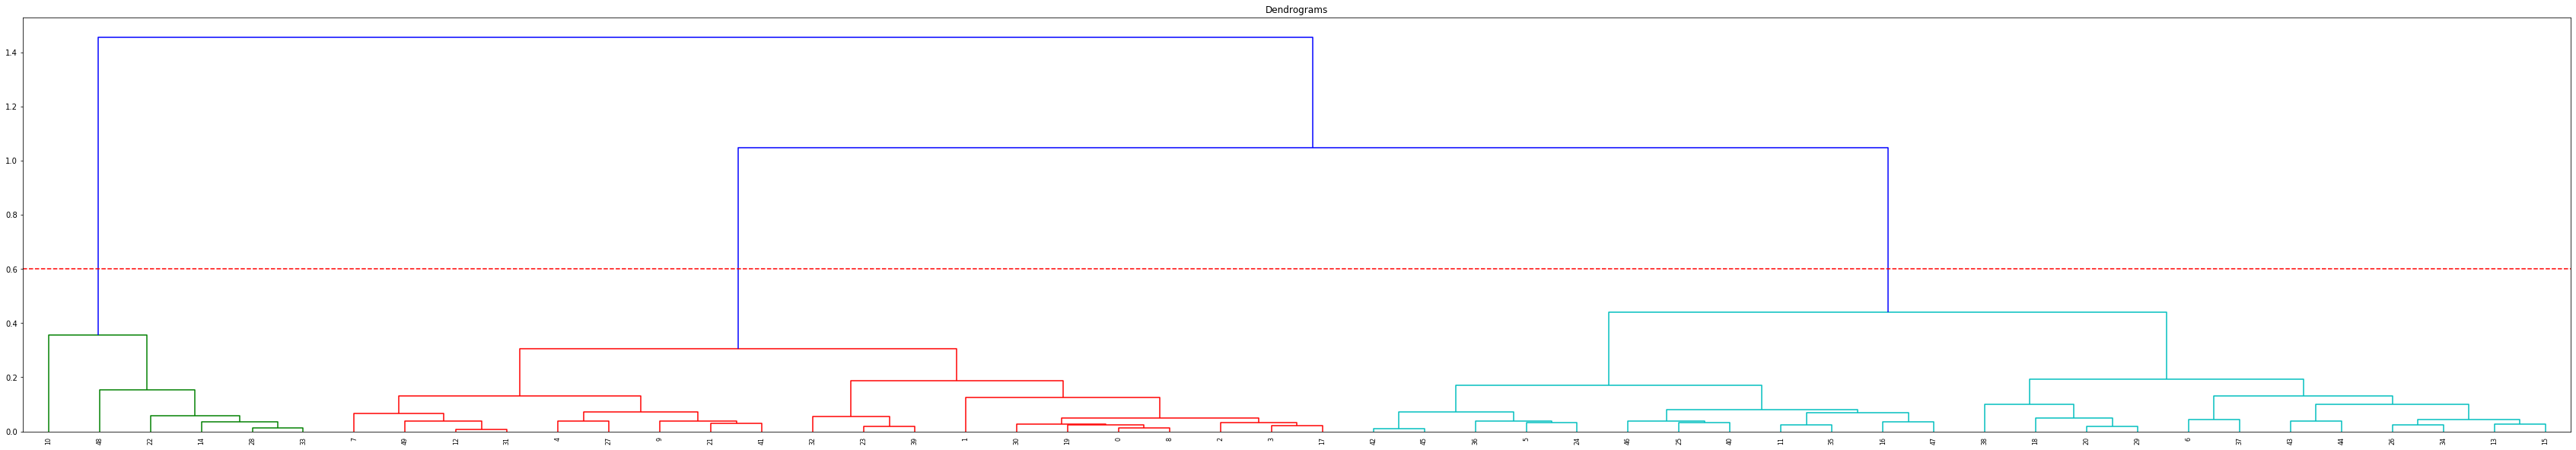

In [13]:
plt.figure(figsize=(60, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(crime_scaled, method='ward'))
plt.axhline(y=0.6, color='r', linestyle='--')

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(crime_scaled)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

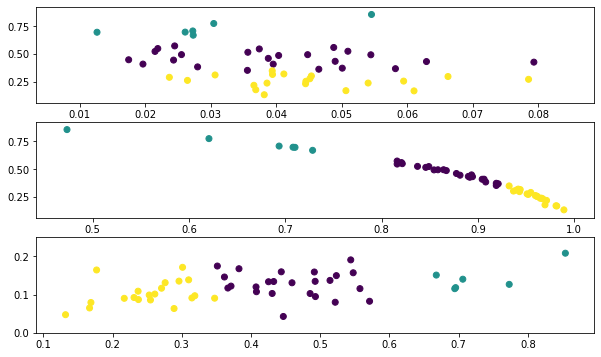

In [15]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.scatter(crime_scaled['Murder'], crime_scaled['UrbanPop'], c=cluster.labels_) 

plt.subplot(3,1,2)
plt.scatter(crime_scaled['Assault'], crime_scaled['UrbanPop'], c=cluster.labels_) 

plt.subplot(3,1,3)
plt.scatter(crime_scaled['UrbanPop'], crime_scaled['Rape'], c=cluster.labels_) 


plt.show()

In [16]:
cluster1_labels=pd.Series(cluster.labels_)
crime["Cluster_ID"] = cluster1_labels # creating a  new column and assigning it to new column 
crime.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2


In [17]:
# getting aggregate mean of each cluster
crime_ave = crime.groupby("Cluster_ID").mean().reset_index()

In [18]:
crime_ave.head()

,Cluster_ID,Murder,Assault,UrbanPop,Rape
0,0,5.770833,129.083333,65.958333,18.575000
1,1,2.616667,54.833333,62.000000,12.333333
2,2,11.760000,255.550000,66.100000,27.090000


In [19]:
# creating a csv file 
crime_ave.to_csv("airlines.csv",encoding="utf-8")

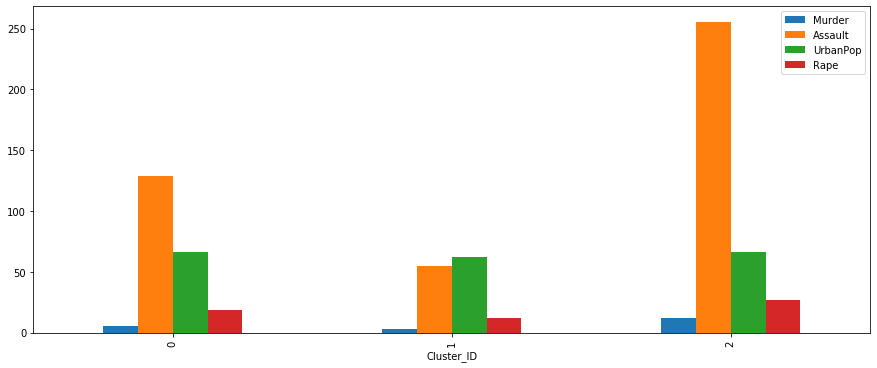

In [20]:
#plotting barplot for all 5 clusters

crime_ave.plot(x="Cluster_ID", y=["Murder","Assault","UrbanPop","Rape"], kind="bar", figsize=(15,6))

### Conclusion:- 

    - Chosen the threshold as 0.6 to cut the dendrogram considering above this threshold is maximum distance.
    - The cut-off line is intersecting at three points in dendrogram, so 3 clusters have been chosen.